Link to colab = [https://colab.research.google.com/drive/1yRwGiMDKxkQeYA9jD1cOJ6CGoIH_wgtF?usp=sharing]

# Clean Data Midterm Code

In [3]:
import pandas as pd

#### Sheet 1: International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015

In [4]:
#Countrydf = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 1, skiprows = 15, names = ['Major area, region, country or area of destination','Country code'])
#Countrydf
sheet_1 = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 1, skiprows = 15, 
                        names = ['Sort Order','Countrycode','Type of Data',
                                 'B1990','B1995','B2000','B2005','B2010','B2015','M1990','M1995','M2000',
                                 'M2005','M2010','M2015','F1990','F1995','F2000','F2005','F2010','F2015'])


sheet_1['Type of Data'] = sheet_1['Type of Data'].fillna("")
for i in sheet_1.columns[5:]:
  
  sheet_1[i] = sheet_1[i].replace([".."], "-")
IMS_2015 = pd.wide_to_long(sheet_1,
                           stubnames = ['M','F','B'], 
                           i=['Sort Order','Countrycode','Type of Data'],
                           j='Year').reset_index()

IMS_2015.rename( columns= {'M':'Male','F':'Female','B':'BothSexes'}, inplace = True)
IMS2015 = IMS_2015.drop(columns = ['Sort Order'])

IMS2015 = pd.melt(IMS_2015, 
                  id_vars = ['Countrycode', 'Type of Data','Year'], 
                  value_vars = ['Female', 'BothSexes', 'Male'], 
                  var_name = 'Sex', 
                  value_name = 'InternationalMigrantStock', 
                  ignore_index=False)
sex_category = ['Male', 'BothSexes','Female']
IMS2015["Sex"]=pd.Categorical(IMS2015["Sex"],categories = sex_category)

IMS2015 = IMS2015.sort_values(by=['Countrycode', 'Year', "Sex"])
IMS2015 = IMS2015.sort_index()
#Remove index so data visualization code can read column names

#IMS2015.set_index(['Year', 'Countrycode'], inplace=True)

#saving df as file
IMS2015.to_pickle('IMS2015.pkl')
IMS2015 = pd.read_pickle('IMS2015.pkl')
IMS2015


,Countrycode,Type of Data,Year,Sex,InternationalMigrantStock
0,900,,1990,Male,77747510
0,900,,1990,Female,74815702
0,900,,1990,BothSexes,152563212
1,900,,1995,Male,81737477
1,900,,1995,BothSexes,160801752
...,...,...,...,...,...
1588,876,B,2010,Female,1375
1588,876,B,2010,Male,1401
1589,876,B,2015,Male,1438
1589,876,B,2015,BothSexes,2849


#### Sheet 2:Total population at mid-year by sex and by major area, region, country or area, 1990-2015 (thousands) 

In [5]:
sheet_2 = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 2, skiprows = 15, 
                        names = ['Sort Order','Notes','Countrycode',
                                'B1990','B1995','B2000','B2005','B2010','B2015','M1990','M1995','M2000','M2005','M2010','M2015',
                                'F1990','F1995','F2000','F2005','F2010','F2015'])

#For empty cells, fill with nothing instead of NAN
sheet_2['Notes'] = sheet_2['Notes'].fillna("")

for i in sheet_2.columns[4:]:
  
  sheet_2[i] = sheet_2[i].replace([".."], "-")

#Pop = total population at mid-year by sex and location
Pop_2015 = pd.wide_to_long(sheet_2,
                           stubnames = ['B', 'M','F'], 
                           i=['Sort Order','Notes','Countrycode'],
                           j='Year').reset_index()

Pop_2015.rename(columns= {'B':'BothSexes', 'M':'Male','F':'Female'}, inplace = True)

Pop_2015 = Pop_2015.drop(columns = ['Notes', 'Sort Order'])

Pop_2015 = pd.melt(Pop_2015, id_vars = 
                   ['Countrycode','Year'], 
                   value_vars = ['BothSexes','Female', 'Male'], 
                   var_name = 'Sex', value_name = 'PopulationThousands', 
                   ignore_index=False)

sex_category = ['Male', 'Female', 'BothSexes']
Pop_2015["Sex"]=pd.Categorical(Pop_2015["Sex"],categories = sex_category)

Pop2015= Pop_2015.sort_values(by=["Countrycode", "Year","Sex"])
Pop2015 = Pop2015.sort_index()
#Pop2015 = Pop2015.set_index(["Sort Order"])

#saving df as file
Pop2015.to_pickle('Pop2015.pkl')
Pop2015 = pd.read_pickle('Pop2015.pkl')
Pop2015

,Countrycode,Year,Sex,PopulationThousands
0,900,1990,Male,2670423.701
0,900,1990,BothSexes,5309667.699
0,900,1990,Female,2639243.998
1,900,1995,Male,2886635.893
1,900,1995,Female,2848487.191
...,...,...,...,...
1588,876,2010,BothSexes,13.565
1588,876,2010,Male,-
1589,876,2015,Male,-
1589,876,2015,Female,-


In [6]:
### Sheet 3: International migrant stock as a percentage of the total population, 1990-2015

In [7]:
sheet_3 = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 3, skiprows = 15, 
                        names = ['Sort Order','Major area, region, country or area of destination','Notes','Countrycode','Type of Data',
                                 'B1990','B1995','B2000','B2005','B2010','B2015','M1990','M1995','M2000',
                                 'M2005','M2010','M2015','F1990','F1995','F2000','F2005','F2010','F2015'])
sheet_3['Notes'] = sheet_3['Notes'].fillna("")

sheet_3['Type of Data'] = sheet_3['Type of Data'].fillna("")

for i in sheet_3.columns[5:]:
  
  sheet_3[i] = sheet_3[i].replace([".."], "-")
  
#IMSPop = International migrant stock as a percentage of the total population by sex and location
IMSP_2015 = pd.wide_to_long(sheet_3,
                           stubnames = ['B','M','F'], 
                           i=['Sort Order','Major area, region, country or area of destination','Notes','Countrycode','Type of Data'],
                           j='Year').reset_index()
IMSP_2015.rename(
    columns= {'Major area, region, country or area of destination' : 'Location','B':'BothSexes','M':'Male','F':'Female'}, 
    inplace = True)

IMSP_2015 = IMSP_2015.drop(columns = ['Notes', 'Sort Order', 'Location'])


IMSP2015 = pd.melt(IMSP_2015, 
                   id_vars = ['Countrycode','Type of Data','Year'], 
                   value_vars = ['BothSexes', 'Male','Female'], 
                   var_name = 'Sex', 
                   value_name = 'IMS_Rate', 
                   ignore_index=False)

sex_category = ['Male', 'Female', 'BothSexes']
IMSP2015["Sex"]=pd.Categorical(IMSP2015["Sex"],categories = sex_category)

IMSP2015= IMSP2015.sort_values(by=["Countrycode", "Year","Sex"])
IMSP2015 = IMSP2015.sort_index()
#IMSP2015 = IMSP2015.set_index(["Sort Order"])

#saving df as file
IMSP2015.to_pickle('IMSP2015.pkl')
IMSP2015 = pd.read_pickle('IMSP2015.pkl')
IMSP2015

,Countrycode,Type of Data,Year,Sex,IMS_Rate
0,900,,1990,Male,2.91143
0,900,,1990,BothSexes,2.87331
0,900,,1990,Female,2.83474
1,900,,1995,Male,2.831583
1,900,,1995,Female,2.775658
...,...,...,...,...,...
1588,876,B,2010,BothSexes,20.464431
1588,876,B,2010,Male,-
1589,876,B,2015,Male,-
1589,876,B,2015,Female,-


#### Sheet 4: Female migrants as a percentage of the international migrant stock by major area, region, country or area, 1990-2015

In [8]:
sheet_4 = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 4, skiprows = 15, 
                        names =['Sort Order','Major area, region, country or area of destination','Notes','Countrycode','Type of Data',
                                'F1990','F1995','F2000','F2005','F2010','F2015'])

sheet_4['Notes'] = sheet_4['Notes'].fillna("")

sheet_4['Type of Data'] = sheet_4['Type of Data'].fillna("")

for i in sheet_4.columns[5:]:
  
  sheet_4[i] = sheet_4[i].replace([".."], "-")

#FM_IMSRate = Female migrants as a percentage of the international migrant stock by location
FM_IMSRate_2015 = pd.wide_to_long(sheet_4,
                           stubnames = ['F'], 
                           i=['Sort Order','Major area, region, country or area of destination','Notes','Countrycode','Type of Data'],
                           j='Year').reset_index()
FM_IMSRate_2015.rename(
    columns= {'Major area, region, country or area of destination' : 'Location','F':'Female'}, 
    inplace = True)

FM_IMSRate_2015 = FM_IMSRate_2015.drop(columns = ['Notes', 'Location', 'Sort Order'])

FM_IMSRate2015 = pd.melt(FM_IMSRate_2015, 
                   id_vars = ['Countrycode','Type of Data','Year'], 
                   value_vars = ['Female'], 
                   var_name = 'Sex', 
                   value_name = 'FMigrants_IMS_Rate', 
                   ignore_index=False)
#Realized this dataframe does not need a seperate column for sex, the rate is for female only for the entire dataset
FM_IMSRate2015 = FM_IMSRate2015.drop(columns = ['Sex'])

FM_IMSRate2015= FM_IMSRate2015.sort_values(by=["Countrycode", "Year"])
FM_IMSRate2015 = FM_IMSRate2015.sort_index()
#FM_IMSRate2015 = FM_IMSRate2015.set_index(["Sort Order"])

#saving df as file
FM_IMSRate2015.to_pickle('FM_IMSRate2015.pkl')
FM_IMSRate2015 = pd.read_pickle('FM_IMSRate2015.pkl')
FM_IMSRate2015

,Countrycode,Type of Data,Year,FMigrants_IMS_Rate
0,900,,1990,49.03915
1,900,,1995,49.16879
2,900,,2000,49.112244
3,900,,2005,48.832993
4,900,,2010,48.30566
...,...,...,...,...
1585,876,B,1995,48.869048
1586,876,B,2000,49.478908
1587,876,B,2005,49.513742
1588,876,B,2010,49.5317


#### Sheet 5: Annual rate of change of the migrant stock by sex and by major area, region, country or area, 1990-2015 (percentage)

In [9]:
sheet_5 = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 5, skiprows = 15, 
                        names = ['Sort Order','Major area, region, country or area of destination','Notes','Countrycode','Type of Data',
                                 'B1990-1995','B1995-2000','B2000-2005','B2005-2010','B2010-2015','M1990-1995','M1995-2000','M2000-2005',
                                 'M2005-2010','M2010-2015','F1990-1995','F1995-2000','F2000-2005','F2005-2010','F2010-2015'])

sheet_5['Notes'] = sheet_5['Notes'].fillna("")

sheet_5['Type of Data'] = sheet_5['Type of Data'].fillna("")

for i in sheet_5.columns[5:]:
  
  sheet_5[i] = sheet_5[i].replace([".."], "-")
AnnualRateChange_MS2015 = pd.melt(sheet_5, 
                   id_vars = ['Sort Order', 'Major area, region, country or area of destination','Notes','Countrycode','Type of Data'], 
                   var_name = 'Sex Year', 
                   value_name = 'MSAnnualRateChange')
# AnnualRateChange_MS2015
#Utilizing lambda function to extract sex which is always the first letter and is always in the first position and then Year being 
#everything after the first letter

AnnualRateChange_MS2015=(AnnualRateChange_MS2015.assign(Sex = lambda x: x['Sex Year'].str[0].astype(str), Year = lambda x: x['Sex Year'].str[1:].astype(str)).drop("Sex Year",axis=1))
AnnualRateChange_MS_2015 = AnnualRateChange_MS2015.drop(columns = ['Notes'])
AnnualRateChange_MS_2015.rename(
    columns= {'Major area, region, country or area of destination' : 'Location'}, 
    inplace = True)
#Custom Sorting
AnnualRateChange_MS2015 = AnnualRateChange_MS_2015[["Sort Order",'Location','Countrycode','Type of Data','Year', 'Sex','MSAnnualRateChange']]

#Changing the values of the sex column to be more clear and defined
AnnualRateChange_MS2015.loc[AnnualRateChange_MS2015['Sex'] == 'B','Sex'] = 'BothSexes'
AnnualRateChange_MS2015.loc[AnnualRateChange_MS2015['Sex'] == 'M','Sex'] = 'Male'
AnnualRateChange_MS2015.loc[AnnualRateChange_MS2015['Sex'] == 'F','Sex'] = 'Female'

AnnualRateChange_MS2015 = AnnualRateChange_MS2015.drop(columns = ["Sort Order", "Location"])

#Defining custom ordering through categories and using that to achieve male female and then both sexes as sorting by sex only with categories results in alphabetical ordering!
sex_category= ['Male','Female','BothSexes']
AnnualRateChange_MS2015["Sex"]=pd.Categorical(AnnualRateChange_MS2015["Sex"],categories = sex_category)

AnnualRateChange_MS2015= AnnualRateChange_MS2015.sort_values(by=["Countrycode", "Year","Sex"])
#AnnualRateChange_MS2015 = AnnualRateChange_MS2015.set_index(["Sort Order"])

#saving df as file
AnnualRateChange_MS2015.to_pickle('AnnualRateChange_MS2015.pkl')
AnnualRateChange_MS2015 = pd.read_pickle('AnnualRateChange_MS2015.pkl')
AnnualRateChange_MS2015

,Countrycode,Type of Data,Year,Sex,MSAnnualRateChange
1423,4,B,1990-1995,Male,3.664544
2748,4,B,1990-1995,Female,5.094004
98,4,B,1990-1995,BothSexes,4.299812
1688,4,B,1995-2000,Male,1.828173
3013,4,B,1995-2000,Female,0.398266
...,...,...,...,...,...
3542,5501,,2005-2010,Female,0.601374
892,5501,,2005-2010,BothSexes,0.862323
2482,5501,,2010-2015,Male,-0.649813
3807,5501,,2010-2015,Female,0.098165


### Sheet 6: Estimated refugee stock at mid-year (both sexes) by major area, region, country or area, 1990-2015

In [10]:
sheet_6 = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx", sheet_name = 6, skiprows = 15, 
                        names = ['Sort Order','Major area, region, country or area of destination','Notes','Countrycode','Type of Data',
                                 'B1990','B1995','B2000','B2005','B2010','B2015','1990','1995','2000',
                                 '2005','2010','2015','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015'])

sheet_6['Notes'] = sheet_6['Notes'].fillna("")

sheet_6['Type of Data'] = sheet_6['Type of Data'].fillna("")

for i in sheet_6.columns[5:]:
  
  sheet_6[i] = sheet_6[i].replace([".."], "-")
ERS_2015  = sheet_6.iloc[:,:11]
RPIMS_2015  = sheet_6.iloc[:,:17]
RPIMS_2015.drop(RPIMS_2015.iloc[:,5:11],inplace=True,axis=1)
ARCRS_2015 = sheet_6.iloc[:,:]
ARCRS_2015.drop(ARCRS_2015.iloc[:,5:17],inplace=True,axis=1)

ERS_2015 = pd.melt(ERS_2015, 
                   id_vars = ['Sort Order', 'Major area, region, country or area of destination','Notes','Countrycode','Type of Data'], 
                   var_name = 'Sex Year', 
                   value_name = 'Estimated_Refugee_Stock')
#Using the lambda function to extract the year only. When naming the columns i added a prefix of B indicating that it was for both sexes and wanted
#to avoid column name dupolication in the short term
ERS_2015=(ERS_2015.assign(Year = lambda x: x['Sex Year'].str[1:].astype(str)).drop("Sex Year",axis=1))
ERS_2015 = ERS_2015[["Sort Order",'Major area, region, country or area of destination','Notes','Countrycode','Type of Data', 'Year','Estimated_Refugee_Stock']]

RPIMS_2015 = pd.melt(RPIMS_2015, 
                   id_vars = ['Sort Order', 'Major area, region, country or area of destination','Notes','Countrycode','Type of Data'], 
                   var_name = 'Year', 
                   value_name = 'Refugee_Rate_IMS')

ARCRS_2015 = pd.melt(ARCRS_2015, 
                   id_vars = ['Sort Order', 'Major area, region, country or area of destination','Notes','Countrycode','Type of Data'], 
                   var_name = 'Year', 
                   value_name = 'AnnualRateChange_RS')

# Continue dropping columns for all 3 datasets and sorting according to personal preference! Use previous code

ERS_2015.rename(
    columns= {'Major area, region, country or area of destination' : 'Location'}, 
    inplace = True)
RPIMS_2015.rename(
    columns= {'Major area, region, country or area of destination' : 'Location'}, 
    inplace = True)
ARCRS_2015.rename(
    columns= {'Major area, region, country or area of destination' : 'Location'}, 
    inplace = True)

ERS_2015 = ERS_2015.drop(columns = ['Notes', 'Location', 'Sort Order'])
RPIMS_2015 = RPIMS_2015.drop(columns = ['Notes', 'Location', 'Sort Order'])
ARCRS_2015 = ARCRS_2015.drop(columns = ['Notes', 'Location', 'Sort Order'])

ERS_2015= ERS_2015.sort_values(by=["Countrycode", "Year"])
RPIMS_2015= RPIMS_2015.sort_values(by=["Countrycode", "Year"])
ARCRS_2015= ARCRS_2015.sort_values(by=["Countrycode", "Year"])

#### Estimated refugee stock at mid-year 


In [11]:
#saving df as file
#Estimated refugee stock at mid-year 
ERS_2015.to_pickle('ERS_2015.pkl')
ERS_2015= pd.read_pickle('ERS_2015.pkl')

ERS_2015

,Countrycode,Type of Data,Year,Estimated_Refugee_Stock
98,4,B,1990,25
363,4,B,1995,19605
628,4,B,2000,0
893,4,B,2005,32
1158,4,B,2010,6434
...,...,...,...,...
362,5501,,1995,3657332
627,5501,,2000,4175423
892,5501,,2005,2450439
1157,5501,,2010,3482232


#### Refugees as % of IMS

In [12]:
#saving df as file
#Refugees as % of IMS
RPIMS_2015.to_pickle('RPIMS_2015.pkl')
RPIMS_2015 = pd.read_pickle('RPIMS_2015.pkl')

RPIMS_2015

,Countrycode,Type of Data,Year,Refugee_Rate_IMS
98,4,B,1990,0.043338
363,4,B,1995,27.411146
628,4,B,2000,0
893,4,B,2005,0.036655
1158,4,B,2010,6.292667
...,...,...,...,...
362,5501,,1995,23.837108
627,5501,,2000,27.329608
892,5501,,2005,17.857725
1157,5501,,2010,24.306075


#### Annual rate of change of refugee stock


In [13]:
#saving df as file
#Annual rate of change of refugee stock
ARCRS_2015.to_pickle('ARCRS_2015.pkl')
ARCRS_2015= pd.read_pickle('ARCRS_2015.pkl')

ARCRS_2015

,Countrycode,Type of Data,Year,AnnualRateChange_RS
98,4,B,1990-1995,128.99347
363,4,B,1995-2000,-
628,4,B,2000-2005,-
893,4,B,2005-2010,102.911692
1158,4,B,2010-2015,50.501739
...,...,...,...,...
97,5501,,1990-1995,-7.985276
362,5501,,1995-2000,2.734543
627,5501,,2000-2005,-8.510689
892,5501,,2005-2010,6.165803


# Final Code

In [14]:
#import necessary packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import pandas as pd
import plotly.express as px


### Sheet 1 (IMS2015): International migrant stock  1990-2015


Text(0, 0.5, 'InternationalMigrantStock (in millions')

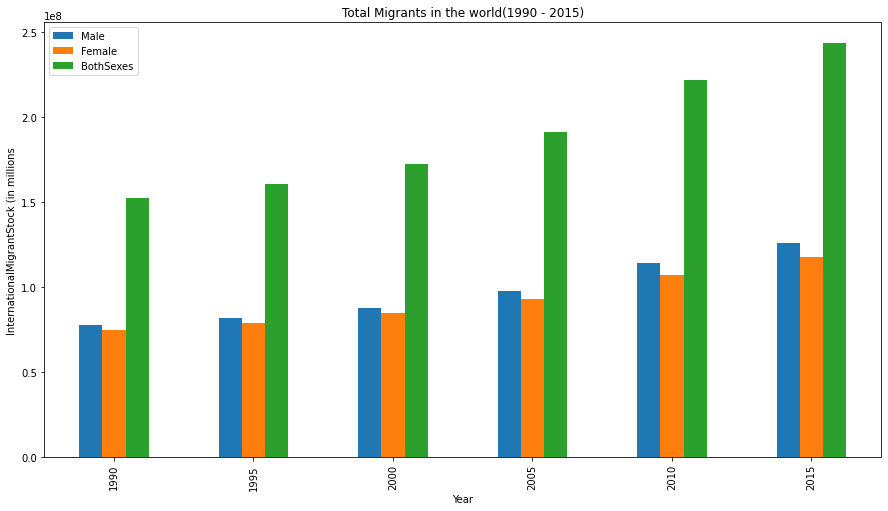

In [15]:
import matplotlib.pyplot as plt
#unstacked bar plot, comparing the category WORLD (900) over the 6 year period (1990-2015) to look at differences in total migrant stock between sexes. 
#to look at the migrant stock for different sexes (male, female, both) over the years
IMS2015_WorldPlot = pd.DataFrame({"Male":[77747510,81737477,87884839,97866674,114613714,126115435],
                                  "Female": [74815702, 79064275, 84818470, 93402426, 107100529, 117584801],
                                  "BothSexes": [152563212, 160801752, 172703309, 191269100, 221714243, 243700236]}, 
                                 index=["1990", "1995", "2000", "2005", "2010", "2015"])

IMS2015_WorldPlot.plot(kind="bar",figsize=(15, 8))

plt.title("Total Migrants in the world(1990 - 2015)")

plt.xlabel("Year")

plt.ylabel("InternationalMigrantStock (in millions")
#we can see both sexes increasing over the years and there are more male migrants born in another country than they live in compared to females.

In [16]:
#focus on sex where all corresponding data is revaled by hovering over the bars
#Can aggregate multiple data point in a rectangular mark, indicating country code, IMS count, year
#Color codes and thickness indicates increase in migrant stock towards the year 2015, Europe and Asia being the largest
  #I can later look at these continents seperately through visualizing them
  #this graph is more useful for me than presenting to an audience so I can look at which region has the most IMS 

import plotly.express as px

IMS2015.groupby(by=['Countrycode', 'Year']).size()

#data on countries and regions not including development status and world
IMS2015_barfig = px.bar(IMS2015.iloc[91:4680], x= 'Sex', y='InternationalMigrantStock', color='Year', 
             hover_data=['Countrycode'], title = 'International Migrant Stock by Sex, Country Code between 1990-2015')
IMS2015_barfig.show()

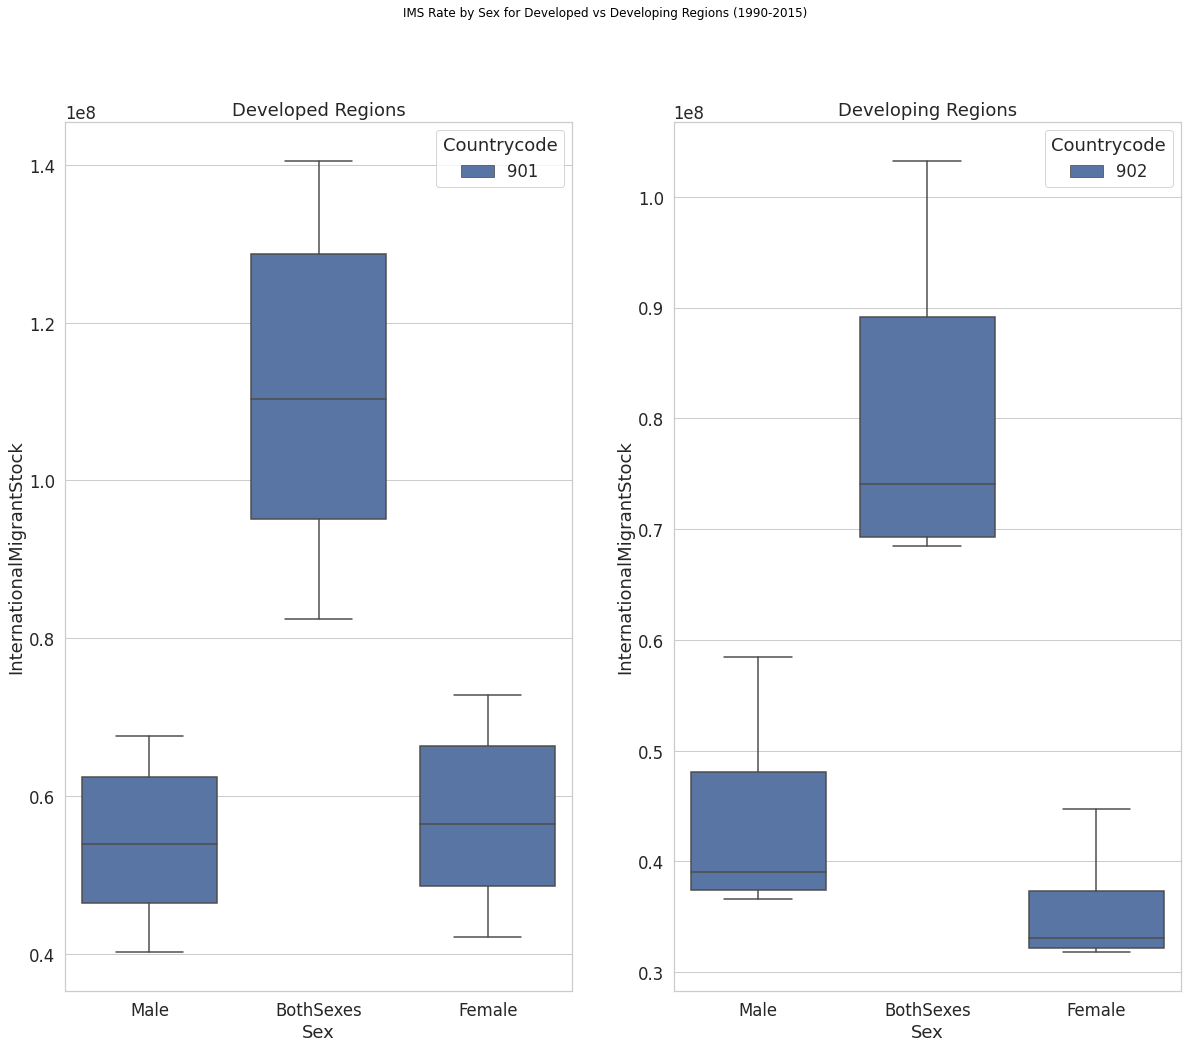

In [17]:
#International Migrant Stock by Sex and Development Status between 1990-2015(UN). 
#I will visualize Migrant Stock for developed and developing regions and look at sex differences
  #world (country code 900) not included 

#plotting this box plot allows me to see which region had the most International Migrant Stock by sex and year 
  #colours indicated by year so if i want to look at 2015, i hover over the yellow rectangles 
  #conclusions:
    #can see that in 1990-2015, developed regions had most IMS for all sexes (individual and both) compared to developed regions
    #can see that is developing regions had most IMS in 2015 for all sexes


#showing country code to see IMS by development status (developed, developing)

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,16))
fig.suptitle('IMS Rate by Sex for Developed vs Developing Regions (1990-2015)')

sns.set(rc={'figure.figsize':(11,10)}, font_scale=1.5, style='whitegrid')

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('Developed Regions')
sns.boxplot(data= IMS2015.iloc[18:36], x="Sex", y="InternationalMigrantStock", hue="Countrycode", dodge=False)

plt.subplot(1, 2, 2) # index 2
plt.title('Developing Regions')
sns.boxplot(data= IMS2015.iloc[37:54], x="Sex", y="InternationalMigrantStock", hue="Countrycode", dodge=False)
plt.show()

In [18]:
#I want to show the IMS over the years in Asia and Europe as they have the largest IMS in the world
IMSdata = IMS2015.iloc[1260:1278]
IMS2015Asiafig = px.bar(IMSdata, x= IMSdata.Sex, y=IMSdata.InternationalMigrantStock, color=IMSdata.Year, 
             hover_data=['Countrycode'], title = 'International Migrant Stock by Sex in Asia between 1990-2015')
IMS2015Asiafig.show()
IMS2015Europefig = px.bar(IMS2015.iloc[2269:2286], x= 'Sex', y='InternationalMigrantStock', color='Year', 
             hover_data=['Countrycode'], title = 'International Migrant Stock by Sex in Europe between 1990-2015')
IMS2015Europefig.show()

### Sheet 2 (Pop2015):Total population at mid-year for Both Sexes and by country code, 1990-2015 (thousands) 

Text(0, 0.5, 'Total Population (in thousands')

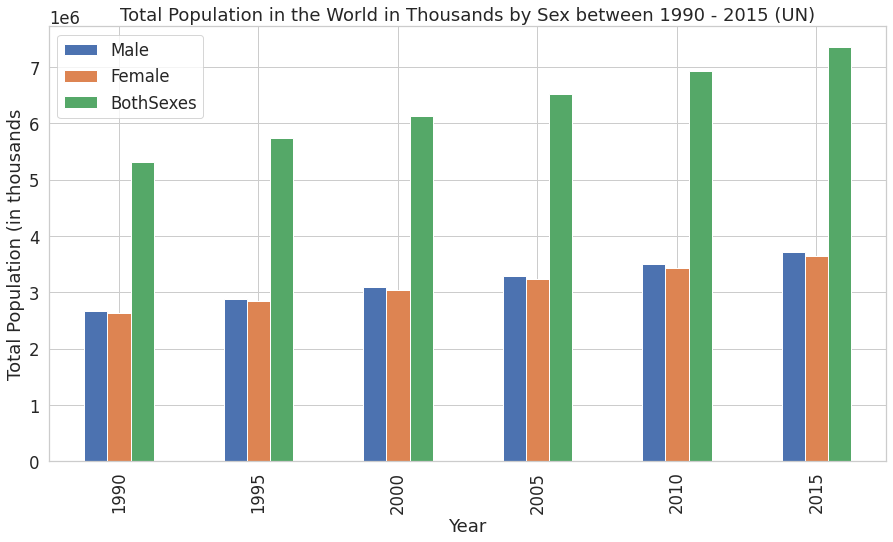

In [19]:
#visualization of Total Population in the World in Thousands Both Sexes between 1990 - 2015 (UN)")

Pop2015_WorldPlot = pd.DataFrame({"Male":[2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753],
                                  "Female":[2639243.998, 2848487.191, 3042084.459, 3234553.601, 3435768.139, 3642266.346],
                                 "BothSexes": [5309667.699,5735123.084, 6126622.121, 6519635.85, 6929725.04300001, 7349472.099]}, 
                                  index=["1990", "1995", "2000", "2005", "2010", "2015"])

Pop2015_WorldPlot.plot(kind="bar",figsize=(15, 8))

plt.title("Total Population in the World in Thousands by Sex between 1990 - 2015 (UN)")

plt.xlabel("Year")

plt.ylabel("Total Population (in thousands")

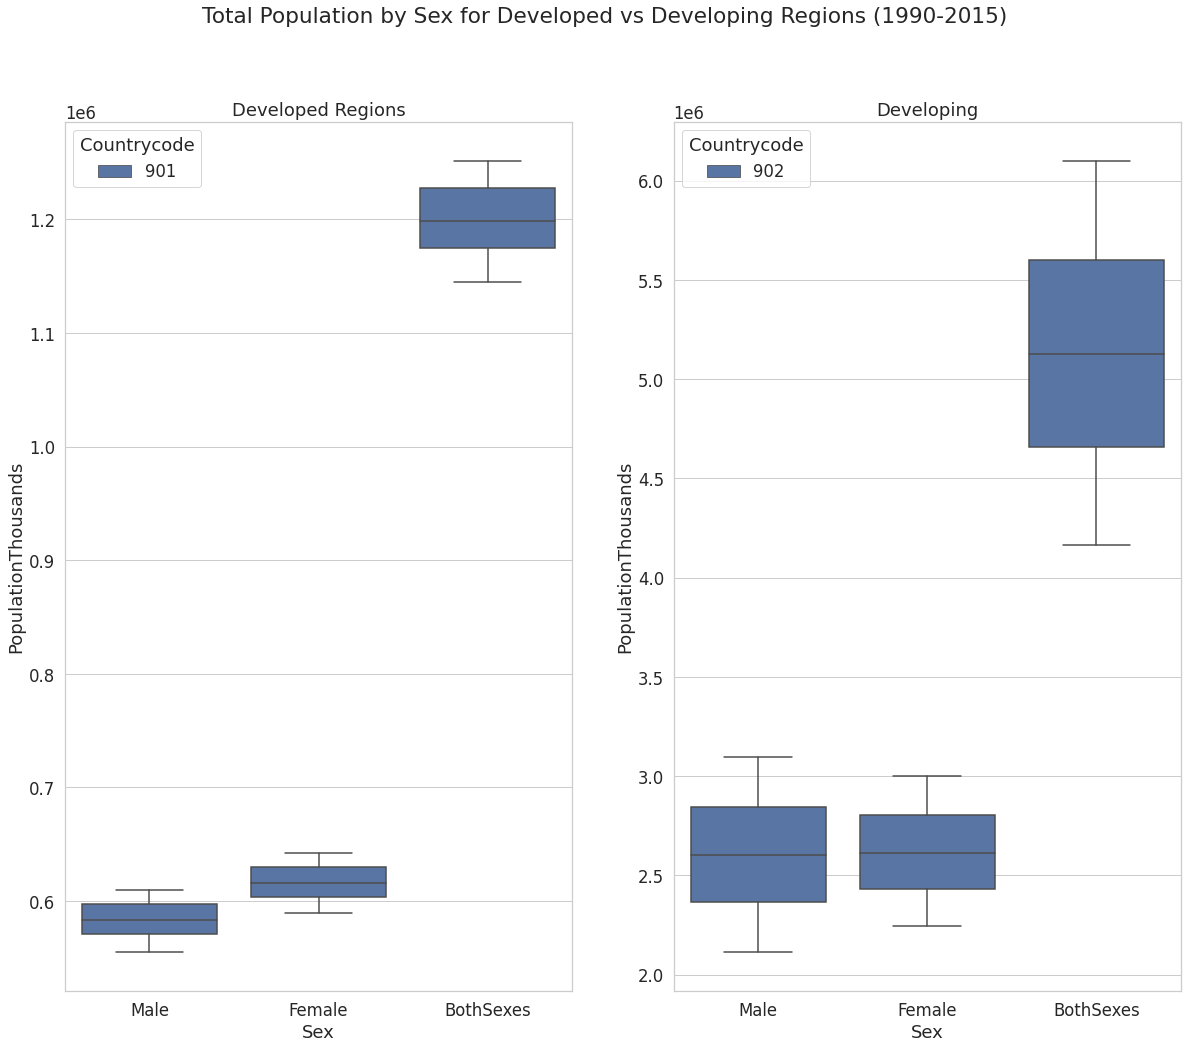

In [20]:
#Total Population at Mid-year by Sex and by Development Status between 1990-2015(UN)
#I will visualize population of regions that are developed and developing by their country code. 
#can see that those with larger populations are most probably not developed countries 
#(explanatory factors may include ratio of limited resources to larger populations)
from matplotlib import pyplot as plt
#print(Pop2015.iloc[18:54])

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,16))
fig.suptitle('Total Population by Sex for Developed vs Developing Regions (1990-2015)')

sns.set(rc={'figure.figsize':(11,10)}, font_scale=1.5, style='whitegrid')

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('Developed Regions')
sns.boxplot(data= Pop2015.iloc[18:36], x="Sex", y="PopulationThousands", hue="Countrycode", dodge=False)

plt.subplot(1,2,2)
plt.title('Developing')
sns.boxplot(data= Pop2015.iloc[37:54], x="Sex", y="PopulationThousands", hue="Countrycode", dodge=False)
plt.show()

### Sheet 3 (IMSP2015): International migrant stock as a percentage of the total population, 1990-2015


Text(0, 0.5, 'IMPS Percentage of Total Population')

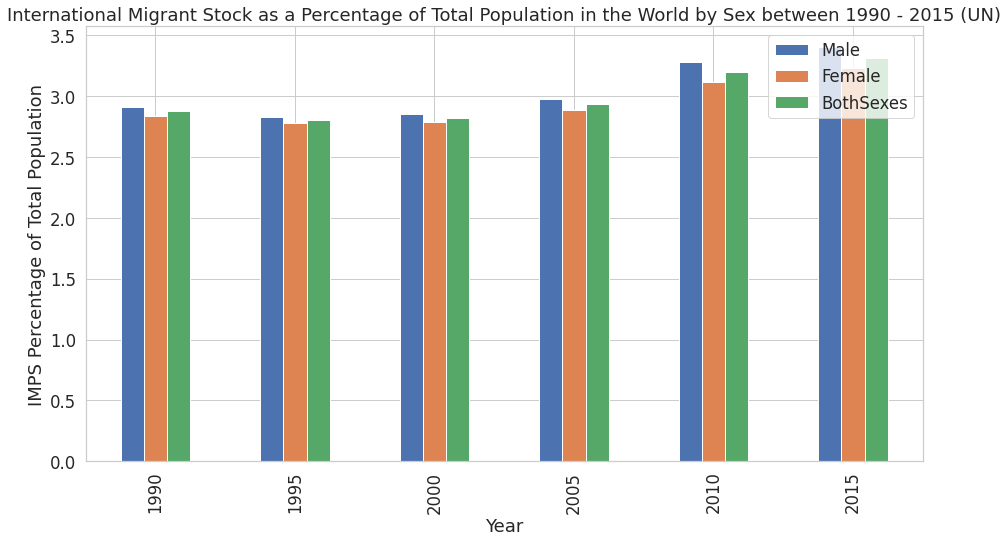

In [21]:
#visualization of IMS as % of Total Population in the World in Thousands by Sex between 1990 - 2015 (UN)")
IMSP2015_WorldPlot = pd.DataFrame({"Male":[2.91142974693064,2.83158250745135,2.84920622246563,2.97912400914136,3.2803413765289,3.40190006713123],
                             "Female": [2.83473987462678, 2.77565843546038, 2.78816946548163, 2.88764502066448, 3.11722225327965, 3.22834163759423],
                             "BothSexes": [2.87330998187953,2.80380646840186, 2.81889931497539, 2.93373900629741, 3.19946666894038, 3.31588762726453]}, 
                            index=["1990", "1995", "2000", "2005", "2010", "2015"])

IMSP2015_WorldPlot.plot(kind="bar",figsize=(15, 8))

plt.title("International Migrant Stock as a Percentage of Total Population in the World by Sex between 1990 - 2015 (UN)")

plt.xlabel("Year")

plt.ylabel("IMPS Percentage of Total Population")

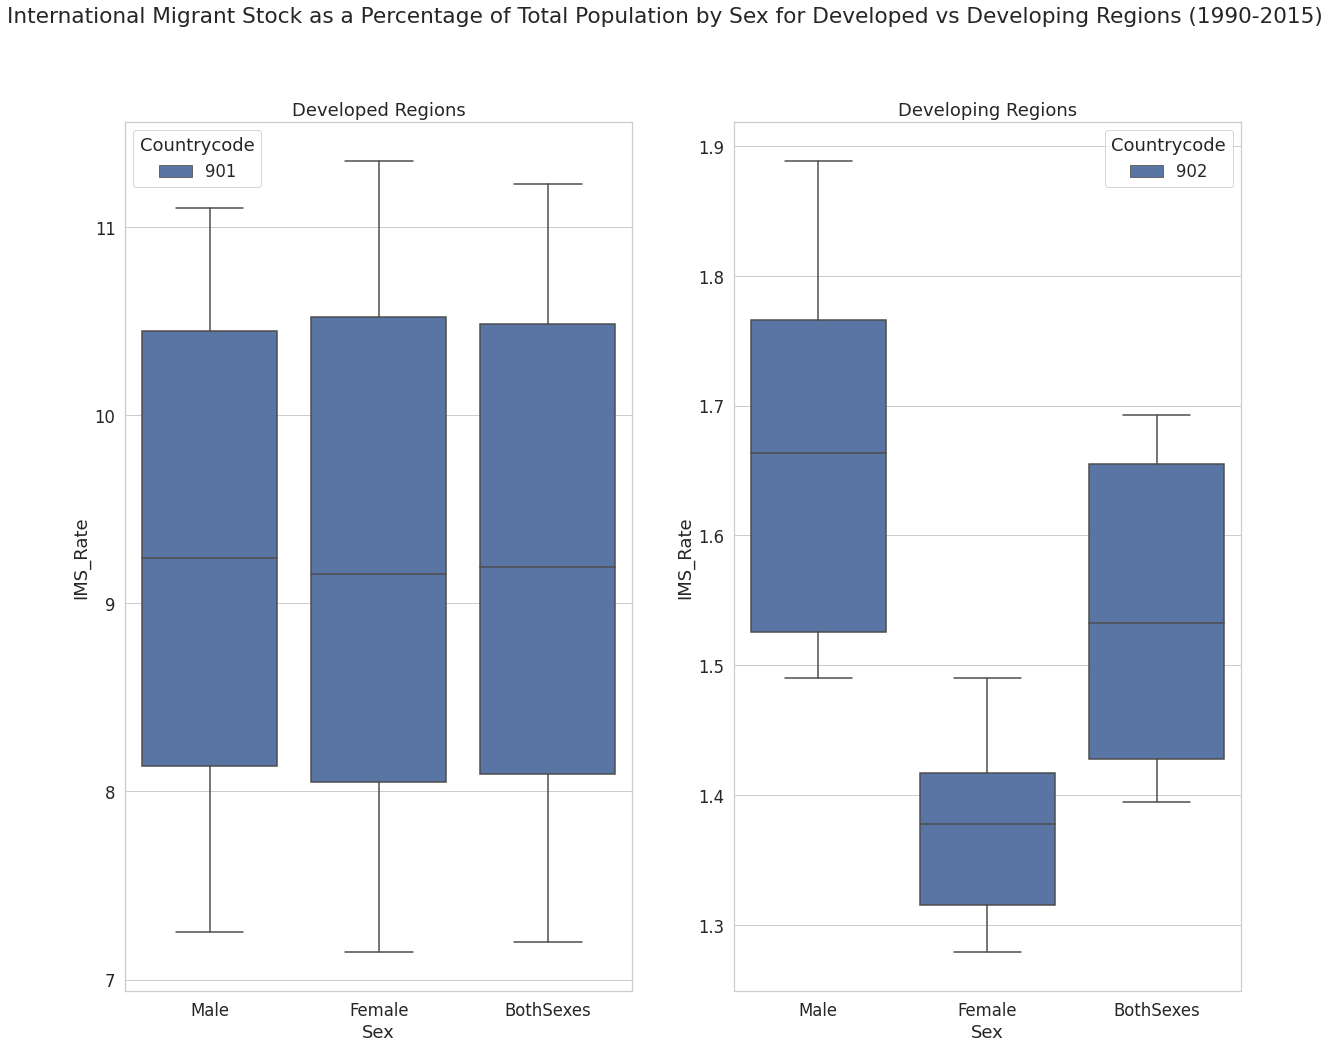

In [22]:
#Development statuses: box plot for developed and developing countries 
#to show majority of data points within 'box' representing countrycode (developement status), look at data symmtery and skewness, outliers. 
#outliers are those developed countries (higher IMS rates), another way of visualizing what IMSP2015_DevScatter plot showed above. 
#developed couuntries (code 901) = symmetric distirbution. Longer box than developing regions = more dispersed data over years
#developing countries (code 902) = also fairly symmetric. Male is left skewed. 
  #median line for male box plot is higher than for female = difference between the two indicating most IMS rate are males 
#least developed
#IMSP2015_BoxPlot = sns.set_style('darkgrid') 
#IMSP2015_BoxPlot = sns.set_palette('flare') 
#IMSP2015_BoxPlot = sns.catplot(data=IMSP2015.iloc[18:90], kind="box", x="Sex", y="IMS_Rate", hue="Countrycode", height=10, aspect=1)


fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,16))
fig.suptitle('International Migrant Stock as a Percentage of Total Population by Sex for Developed vs Developing Regions (1990-2015)')

sns.set(rc={'figure.figsize':(11,10)}, font_scale=1.5, style='whitegrid')

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.title('Developed Regions')
sns.boxplot(data= IMSP2015.iloc[18:36], 
            x="Sex", 
            y='IMS_Rate', 
            hue="Countrycode", 
            dodge=False, 
            labels={'IMS_Rate':'International Migrant Stock Rate'})

plt.subplot(1, 2, 2) # index 2
plt.title('Developing Regions')
sns.boxplot(data= IMSP2015.iloc[37:54], 
            x="Sex", 
            y="IMS_Rate", 
            hue="Countrycode", 
            dodge=False, 
            labels={'IMS_Rate':'International Migrant Stock Rate'})
plt.show()

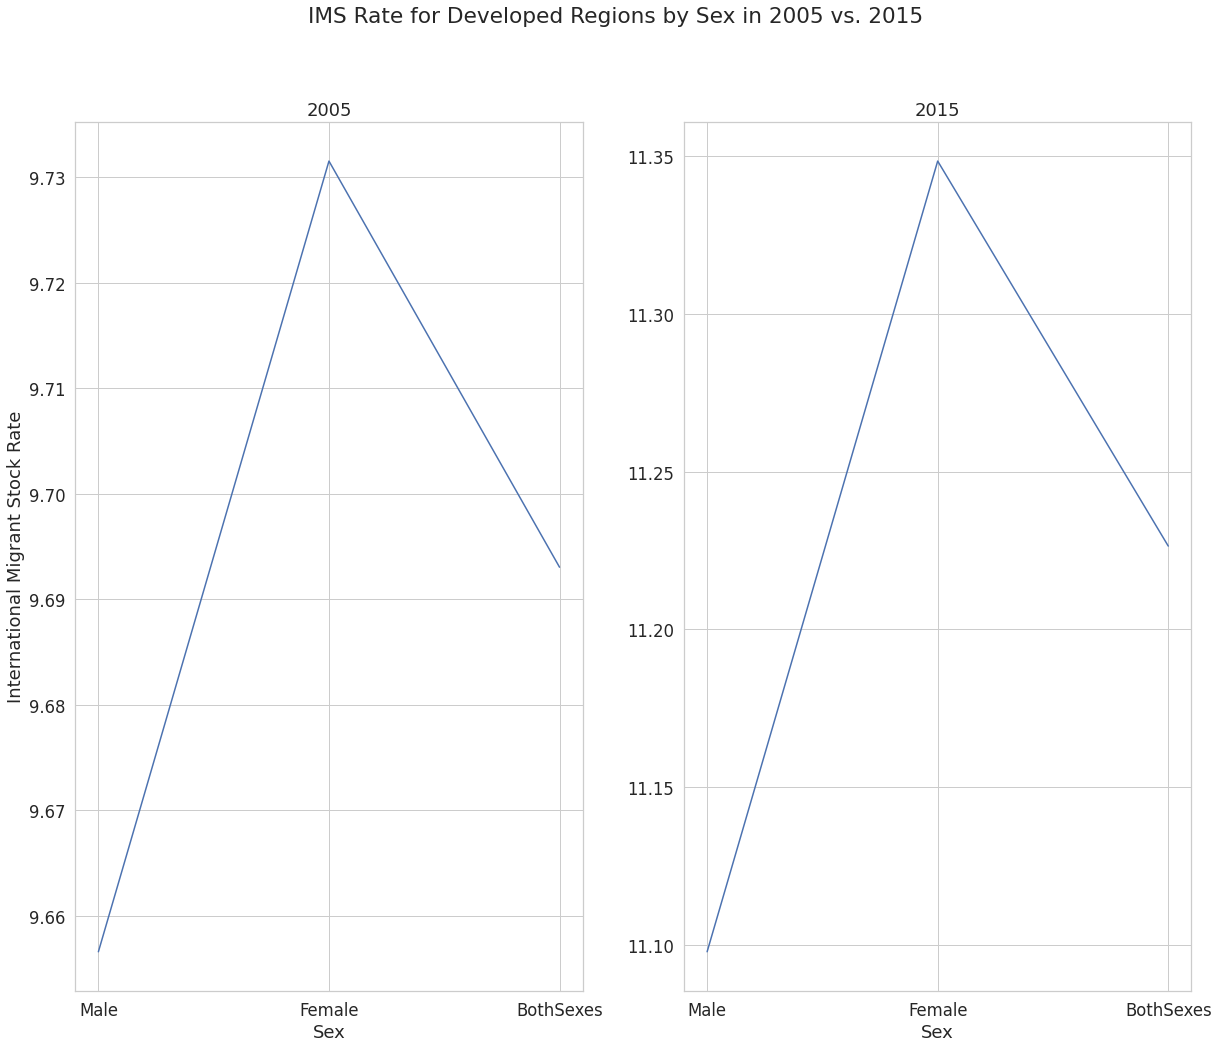

In [23]:
#Line plot showing change in IMS rate by sex comparing 10 years apart (2005 and 2015)
from matplotlib import pyplot as plt
import numpy as np
xPoints = np.array(['Male', 'Female', 'BothSexes'])
y1Points = np.array([9.65659512920837, 9.73153983961891, 9.6930447500951])
y2Points = np.array([11.0978065828728, 11.3484758347514, 11.226422110605])
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20,16))

fig.suptitle('IMS Rate for Developed Regions by Sex in 2005 vs. 2015')

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(xPoints, y1Points)
plt.title("2005")
plt.xlabel('Sex')
plt.ylabel('International Migrant Stock Rate')

plt.subplot(1, 2, 2) # index 2
plt.plot(xPoints, y2Points)
plt.title("2015")
plt.xlabel('Sex')

plt.show()

### Sheet 4 (FM_IMSRate2015): Female migrants as a percentage of the international migrant stock by country code 1990-2015


In [24]:
#visualization of Female Migrants as % of IMS in the World between 1990 - 2015 (UN)")
import plotly.express as px
FM_IMSRate2015
data = FM_IMSRate2015.iloc[0:6]
FM_IMSRate2015_figure = px.line(data, 
                                x=data.Year, 
                                y=data.FMigrants_IMS_Rate, 
                                labels={'data.FMigrants_IMS_Rate':'Female Migrants as Percentage of IMS'}, 
                                title="Female Migrants as a Percentage of the international Migrant Stock in the World 1990-2015 (UN)")
FM_IMSRate2015_figure.show()

### Sheet 5 (AnnualRateChange_MS2015): Annual rate of change of the migrant stock by sex and by country code 1990-2015 (percentage)


Text(0, 0.5, 'Annual Rate Change of Migrant Stock')

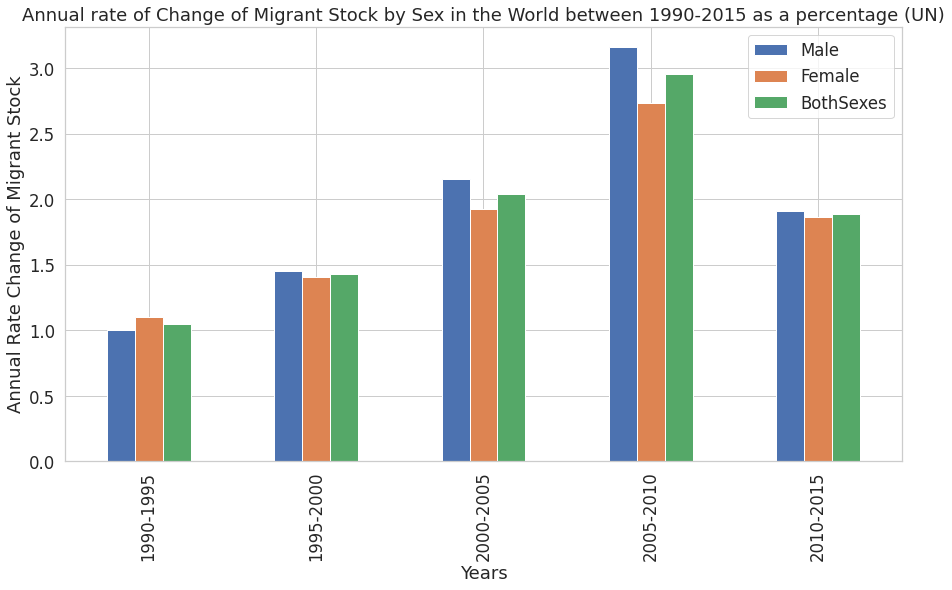

In [25]:
#visualization of Annual rate of Change of Migrant Stock by Sex in the World between 1990-2015 (percentage)UN)")
AnnualRateChange_MS2015_WorldPlot = pd.DataFrame({"Male":[1.00092173351454,1.45029396449908,2.15157546560822,3.1592276505737,1.91260345604639],
                             "Female": [1.10466693052523, 1.40504392845005, 1.92807987032646, 2.73701195098045, 1.86783734328128],
                             "BothSexes": [1.05186474251662,1.42805786309846, 2.0421238327653, 2.95416044064213, 1.89099140002548]}, 
                            index=['1990-1995','1995-2000', '2000-2005','2005-2010', '2010-2015'])

AnnualRateChange_MS2015_WorldPlot.plot(kind="bar",figsize=(15, 8))

plt.title("Annual rate of Change of Migrant Stock by Sex in the World between 1990-2015 as a percentage (UN)")

plt.xlabel("Years")

plt.ylabel("Annual Rate Change of Migrant Stock")

### Sheet 6 (ERS_2015)(RPIMS_2015)(ARCRS_2015): Estimated refugee stock at mid-year by country code and sex 1990-2015


In [26]:
#Look at World stats for each individual table 
ERS_2015
RPIMS_2015
ARCRS_2015

fig1 = px.bar(ERS_2015.iloc[1392:1398], 
              x="Year", 
              y="Estimated_Refugee_Stock",
              labels={'Estimated_Refugee_Stock':'Estimated Refugee Stock'}, 
              title="Estimated refugee stock at mid-year for Both Sexes in the World between 1990-2015 (UN)")
fig1.show()

fig2 = px.bar(RPIMS_2015.iloc[1392:1398], 
              x="Year", y="Refugee_Rate_IMS", 
              labels={'Refugee_Rate_IMS':'Refugee Rate IMS'},
              title= "Refugees as % of International Migrant Stock for Both Sexes in the World between 1990-2015 (UN)")
fig2.show()

fig3 = px.bar(ARCRS_2015.iloc[1160:1165], 
              x="Year", 
              y="AnnualRateChange_RS",
              labels={'AnnualRateChange_RS':'Annual Rate of Change of Refugee Stock'},
              title= "Annual Rate of Change of Refugee Stock for Both Sexes in the World between 1990-2015 (UN)")
fig3.show()



In [27]:
#Canada vs. U.S. estimated refugee stock trend
ERS_2015Canada = ERS_2015.iloc[198:204]

#look at Canada esitmated refugee stock tred
ERS_2015Canadafig = px.bar(ERS_2015Canada, 
              x="Year", 
              y="Estimated_Refugee_Stock", 
              labels={'Estimated_Refugee_Stock' : 'Estimated Refugee Stock'},
              title='Estimated refugee stock at mid-year for Both Sexes in Canada between 1990-2015 (UN)')
ERS_2015Canadafig.show()

#look at US. Estimated refugee stock trend = considering increased security protocols post-9/11 crises 
ERS_2015_USfig1 = px.bar(ERS_2015.iloc[1332:1338], 
              x="Year", 
              y="Estimated_Refugee_Stock", 
              labels={'Estimated_Refugee_Stock' : 'Estimated Refugee Stock'},
              title="Estimated refugee stock at mid-year for Both Sexes in the United States between 1990-2015 (UN)")
ERS_2015_USfig1.show()

In [28]:
#Estimated refugee stock at mid-year for Both Sexes in Developed and Developing Regions between 1990-2015
#plotting change in esitmated refugee stock over years in developed and developing regions indicated by country code
#refugee stock increases towards year 2015 for developing regions 
#regfugee stock was highest in 1995 for developed regions (immigration boom)

#linegraph
ERS_2015Dev = ERS_2015.iloc[1398:1410]
ERS_2015Devfig = px.line(ERS_2015Dev, x="Year", 
              y="Estimated_Refugee_Stock", 
              color = "Countrycode", 
              title='Estimated refugee stock at mid-year for Both Sexes in Developed and Developing Regions between 1990-2015 (UN)')
ERS_2015Devfig.show()


#Developed = ERS_2015.iloc[1398:1404]
#Developing = ERS_2015.iloc[1404:1410]


#another way

ERS_2015_Devfig = px.bar(ERS_2015.iloc[1398:1410], 
                         x= "Year", 
                         y="Estimated_Refugee_Stock", 
                         color="Countrycode", 
                         hover_data=['Countrycode'], 
                         title = 'Estimated refugee stock at mid-year for Both Sexes in the World between 1990-2015 (UN)', 
                         labels={'Estimated_Refugee_Stock':'Estimated Refugee Stock'})
ERS_2015_Devfig.show()


In [29]:
#Guinea high Refugee rate 
RPIMS_2015Guinea = RPIMS_2015.iloc[504:510]
RPIMS_2015Guineafig = px.line(RPIMS_2015Guinea, 
              x="Year", 
              y="Refugee_Rate_IMS", 
              labels={'Refugee_Rate_IMS':'Refugees Rate'},
              title='Refugees as % of International Migrant Stock for Both Sexes in Guinea between 1990-2015 (UN)')
RPIMS_2015Guineafig.show()

In [30]:

#RPIMS_2015.iloc[0:6], this shows that country code 4 reaches 78.6%
  #also tells me type of data is foreign born population 
#will visualize the trend over the years
RPIMS_2015Max = RPIMS_2015.iloc[0:6]
RPIMS_2015Maxfig = px.line(RPIMS_2015Max, x="Year", 
              y="Refugee_Rate_IMS",
              labels={'Refugee_Rate_IMS':'Refugees Rate'}, 
              color = "Countrycode", 
              title='Refugees as % of International Migrant Stock for Both Sexes in Afghanistan between 1990-2015 (UN)')
RPIMS_2015Maxfig.show()

In [31]:

#check country code 4 for afghanistan
  #ARCRS_2015.iloc[0:5]
    #tells me there is 0 in the years 1995-2005 but went from 120% between 2005-2010 to 50% between 2010-2015
    #will look at years 2005-2015
#px bar allows interactive graph to see exact Annual Rate of change
fig4 = px.bar(ARCRS_2015.iloc[3:5], 
              x="Year", 
              y="AnnualRateChange_RS",

              title="Annual Rate of Change of Refugee Stock for Both Sexes in Afghanistan between 2005-2015 (UN)")
fig4.show()
